In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [61]:
data_2d=pd.read_csv('/content/drive/MyDrive/Data S/data_2d.csv', header=None)
mnist=pd.read_csv('/content/drive/MyDrive/Data S/mnist.csv', header=None)

# Data set data_2d

In [62]:
data_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [64]:
X=np.array([
    data_2d[1],
    data_2d[2],
    ]).reshape(200,2)

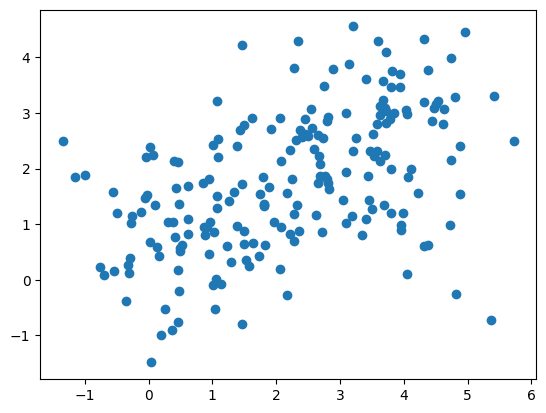

In [66]:
plt.scatter(x=data_2d[2], y=data_2d[1])
plt.show()

In [67]:
X_norm=StandardScaler().fit_transform(X)

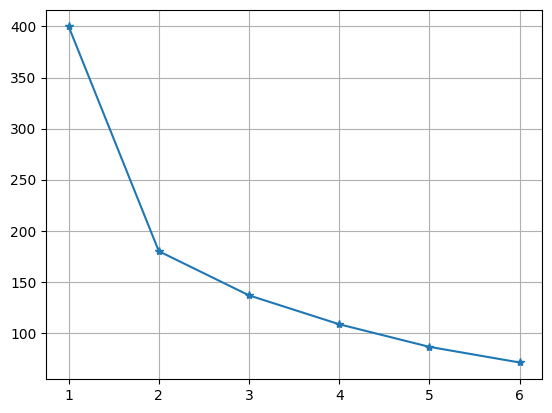

In [89]:
cost=[]
for k in range(1,7):
  kmeans=KMeans(n_clusters=k,random_state=0, n_init="auto").fit(X_norm)
  cost.append(kmeans.inertia_)
plt.plot(range(1,7), cost, marker='*')
plt.grid()
plt.show()

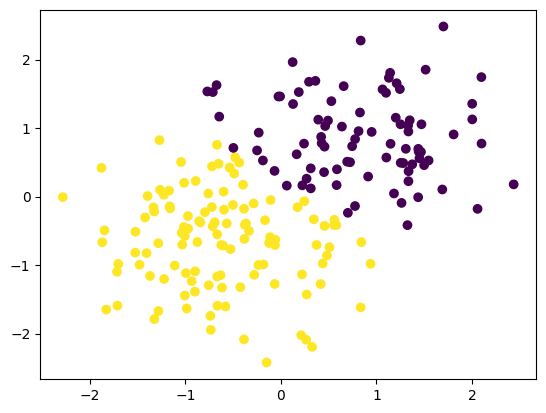

In [83]:
kmeans=KMeans(n_clusters=2,random_state=0, n_init="auto").fit(X_norm)
plt.scatter(X_norm[:,0], X_norm[:,1], c=kmeans.labels_)
plt.show()

# Data set mnist

In [72]:
mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
mnist.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 785, dtype: int64

In [74]:
df_norm=StandardScaler().fit_transform(mnist)

In [75]:
mnist_PCA=PCA(n_components=2, svd_solver='randomized').fit_transform(df_norm)

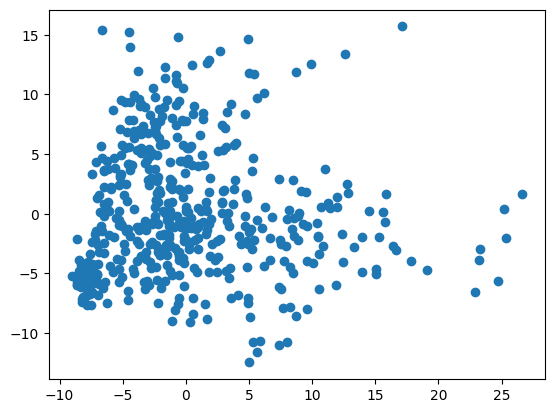

In [85]:
plt.scatter(mnist_PCA[:,0], mnist_PCA[:,1])
plt.show()

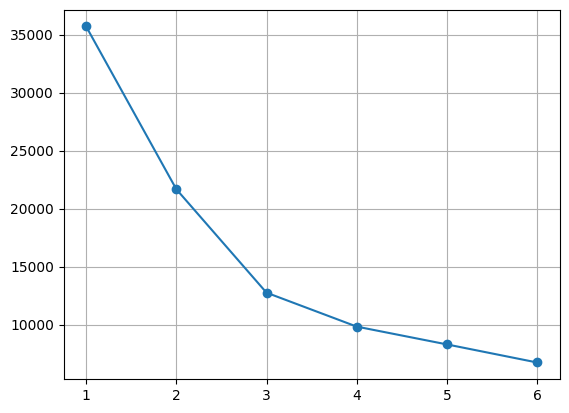

In [88]:
cost_PCA=[]
for k in range(1,7):
  kmeans_PCA=KMeans(n_clusters=k,random_state=0, n_init="auto").fit(mnist_PCA)
  cost_PCA.append(kmeans_PCA.inertia_)
plt.plot(range(1,7), cost_PCA, marker='o')
plt.grid()
plt.show()

In [80]:
kmeans_mnist=KMeans(n_clusters=3,random_state=0, n_init="auto").fit(mnist_PCA)

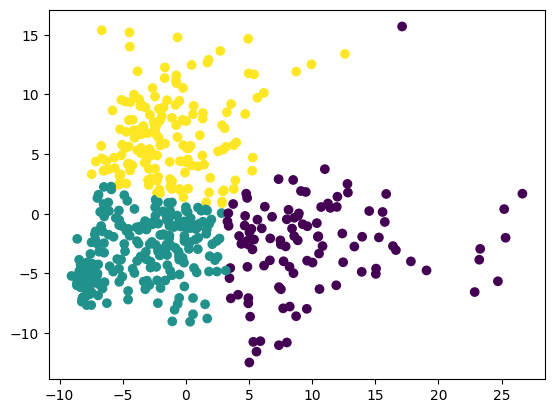

In [81]:
plt.scatter(mnist_PCA[:,0], mnist_PCA[:,1], c=kmeans_mnist.labels_)
plt.show()